In [14]:
# Import the dependencies. 
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np      
# Import the requests library 
import requests
# Import the API key
from config import weather_api_key
# Import the datetime module from the datetime library
from datetime import datetime

In [15]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c39fa72ed3e7eea0ce7023cb94c4474


In [16]:
# Use the citipy module to determine city based on latitude and longitude. 
from citipy import citipy

In [17]:
# Create a set of random latitude and longitude combinations. 
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [18]:
# Add the latitudes and longitudes to a list. 
coordinates = list(lat_lngs)

In [19]:
# Create a list for holding the cities. 
cities = []
# Identify the nearest city for each latitude and longitude combinations. 
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list. 
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count. 
len(cities)

618

In [20]:
# Create an empty list to hold the weather data
city_data = []
# Print the beginning of the logging
print("Beginning Data Retrieval         ")
print("---------------------------------")

# Create countes
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city
    city_url = url + "&q=" + cities[i]
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


t 16 | pacific grove
Processing Record 22 of Set 16 | poum
Processing Record 23 of Set 16 | obo
Processing Record 24 of Set 16 | puro
Processing Record 25 of Set 16 | sola
Processing Record 26 of Set 16 | inhambane
Processing Record 27 of Set 16 | itapeva
Processing Record 28 of Set 16 | kattivakkam
Processing Record 29 of Set 16 | puerto ayora
Processing Record 30 of Set 16 | college
Processing Record 31 of Set 16 | zaysan
Processing Record 32 of Set 16 | robertson
Processing Record 33 of Set 16 | zhezkazgan
Processing Record 34 of Set 16 | neiafu
Processing Record 35 of Set 16 | gizo
Processing Record 36 of Set 16 | vanavara
Processing Record 37 of Set 16 | nazarovo
Processing Record 38 of Set 16 | eureka
Processing Record 39 of Set 16 | brownwood
Processing Record 40 of Set 16 | hermanus
Processing Record 41 of Set 16 | urumqi
Processing Record 42 of Set 16 | ambulu
Processing Record 43 of Set 16 | leticia
Processing Record 44 of Set 16 | contamana
Processing Record 45 of Set 16 | u

In [ ]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cabo San Lucas,MX,2021-04-09 20:41:16,22.8909,-109.9124,93.20,20,20,9.22
1,Mataura,NZ,2021-04-09 20:38:11,-46.1927,168.8643,46.99,91,100,1.01
2,Vila Velha,BR,2021-04-09 20:40:35,-20.3297,-40.2925,79.00,78,75,14.97
3,Puerto Ayora,EC,2021-04-09 20:41:16,-0.7393,-90.3518,80.60,78,75,3.44
4,Yellowknife,CA,2021-04-09 20:41:16,62.4560,-114.3525,16.00,57,75,16.11
5,Jacareacanga,BR,2021-04-09 20:41:17,-6.2222,-57.7528,85.77,62,87,3.94
6,Vostok,RU,2021-04-09 20:41:17,46.4856,135.8833,21.15,78,77,5.17
7,Sao Bento,BR,2021-04-09 20:41:17,-6.2833,-37.7500,79.29,52,100,5.97
8,Barrow,US,2021-04-09 20:41:17,71.2906,-156.7887,-13.00,70,1,12.66
9,East London,ZA,2021-04-09 20:37:55,-33.0153,27.9116,66.00,84,33,3.87


In [12]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV. 
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [24]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


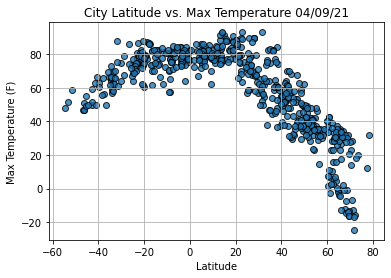

In [26]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


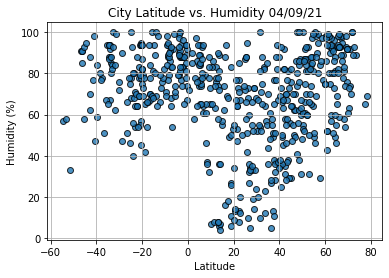

In [27]:
# Build the scatter plots for latitude vs humidity 
plt.scatter(lats, 
            humidity, 
            edgecolors="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig2.png")

# Show plot
plt.show()

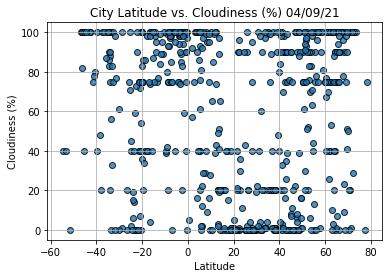

In [30]:
# Build the scatter plots for latitude vs cloudiness
plt.scatter(lats, 
            cloudiness,
            edgecolors="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig3.png")

# Show plot
plt.show()

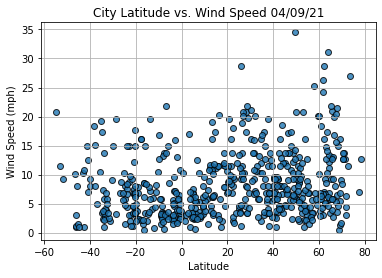

In [31]:
# Build the scatter plots for latitude vs wind speed
plt.scatter(lats, 
            wind_speed, 
            edgecolors="black",
            linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig4.png")

# Show plot
plt.show()